# Load Data from an Intan RHD file.
### Header information (and saved data, if present) will be stored in the *result* variable. You'll also be able to specify a channel's name to plot its recorded data as an example of accessing data from *result*.

In [1]:
# Load the background Python functions that allow for data loading and plotting
%run importrhdutilities.py

### Name of file to load. To load a different file, move it to the same directory as this notebook, and change the following 'filename' variable to point the name of your file.

In [2]:
# filename = '../dataFolder/m7_whiteNoise_4_220112.rhd' # Change this variable to load a different data file
filename = r'G:\Other computers\My Computer\TanviStuff\PiliferRecordings\2022_02_04\m10_whiteNoise_2.rhd'
result, data_present = load_file(filename)


Reading Intan Technologies RHD2000 Data File, Version 1.5

Found 16 amplifier channels.
Found 0 auxiliary input channels.
Found 0 supply voltage channels.
Found 1 board ADC channel.
Found 1 board digital input channel.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 361.440 seconds of data.  Amplifiers were sampled at 30.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
100% done...
Parsing data...
Done!  Elapsed time: 146.9 seconds


### Once a file is loaded, all of its information is stored in the *result* variable. If further analysis of recorded data is desired, this is the variable that should be used.

In [8]:
############################ Names of different channels #########################

## amplifier_channels = A-001, A-002 etc
# result['amplifier_data']

## ADC input = ADC-07 etc
# result['t_board_adc']

## digital input = DIN-00
# result['board_dig_in_data']

In [3]:
import matplotlib.pyplot as plt

In [4]:
# plt.plot(result['t_board_adc'][0:11*30000], result['board_adc_data'][0][0:11*30000])

In [5]:
result['amplifier_data'].shape

(16, 10843200)

In [6]:
# Pulling out the up and down index of the digital input

digiIn = result['board_dig_in_data'][0]
strts = digiIn
strts = [idx for idx, v in enumerate(digiIn) if (v) & (not digiIn[idx-1])]
stps = [idx for idx, v in enumerate(digiIn) if (not v) & (digiIn[idx-1])]

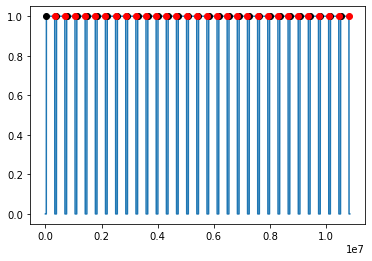

In [7]:
plt.plot(result['board_dig_in_data'][0])
plt.plot(strts, np.ones(len(strts)), 'ok')
plt.plot(stps, np.ones(len(stps)), 'or')

(7500.0, 15000.0)

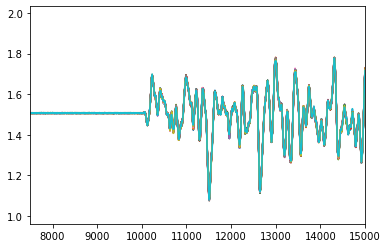

In [8]:
## Making sure they are aligned at the index I have pulled out!
for ss, st in zip(strts, stps):
    plt.plot(result['board_adc_data'][0][ss-10000:st+10000])
plt.xlim(7500,15000)

In [9]:
## export index values

name = 'm10_whiteNoise_2'
channel = [0, 1]; # specify the channel used for sorting data - A-012 would be 11

import pandas as pd
index = pd.DataFrame({'index_starts':strts,
             'index_stops': stps})
index.to_csv('../dataFolder/' + name + '_index.csv', index = False)

## export raw data - stimulus and amplifier data
RawData = pd.DataFrame({'stimulus': result['board_adc_data'][0] - np.mean(result['board_adc_data'][0])
#                     , 'amplifier_channel_sorted_00': result['amplifier_data'][channel[0]]
#                         ,'amplifier_channel_sorted_01': result['amplifier_data'][channel[1]]
                       })
RawData.to_csv('../dataFolder/' + name + '_RawData.csv', index = False)